Microwave Radiometer (MWR) MP3000A data download from GO-AMAZON project on ARM (ATMOSPHERIC RADIATION MEASUREMENT)

Description: Microwave Radiometer Retrievals (MWRRET) of Cloud Liquid Water and Precipitable Water Vapor

Site: Manacapuru, Amazonas, Brazil; Mobile Facility (GOAMAZON) (MAO)

Location: Manacapuru, Amazonas, Brazil; AMF1

Facility Code: M1

Category: Cloud Properties

Data Type: Routine Data 

Source Instrument/Data: CEIL, INTERPSONDE, MET, MPL, MPLCMASK, MWR, MWRP, MWRRET, SONDE, SONDEGRID, WACRARSCL View Less

Sampling Interval: 20.000000 seconds

Start Date: 2014-01-08 ------------ End Date: 2015-12-01

DOI: 10.5439/1027369

Import the packages


In [1]:
import os

import act
import matplotlib.pyplot as plt

# First import the NetCDF4 package
from netCDF4 import Dataset
from netCDF4 import MFDataset

# Next import plotting functions
from pylab import *

from datetime import date, datetime

In [2]:
# Place your username and token here
my_arm_username = 'LourencoCavalcante' 
api_access_token = '311d84bc76093a97' #https://adc.arm.gov/armlive/register


DATASTREAM: maomwrlosM1.b1

Download data

In [8]:
#Site: Manacapuru, Amazonas, Brazil; Mobile Facility (GOAMAZON) (MAO)
# GO - AMAZON (Start: 2014-01-08 for End: 2015-12-01)
datastream = 'maomwrlosM1.b1'
date_start = '2014-06-01' 
date_end = '2014-06-01'

# Download MWR data on ARM
act.discovery.download_data(my_arm_username, api_access_token, datastream, date_start, date_end)


#Create directores for output plot figures
dir = (f'./{datastream}/output/figures')  
os.makedirs(dir)
#os.mkdir(dir)

[DOWNLOADING] maomwrlosM1.b1.20140601.000007.cdf
[DOWNLOADING] maomwrlosM1.b1.20140601.000040.cdf


Code to plot ARM NetCDF data

c:\ProgramData\Miniconda3\envs\act_env\Lib\site-packages\act\utils\data_utils.py:199: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(diff).mode[0]
c:\ProgramData\Miniconda3\envs\act_env\Lib\site-packages\act\utils\data_utils.py:199: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or

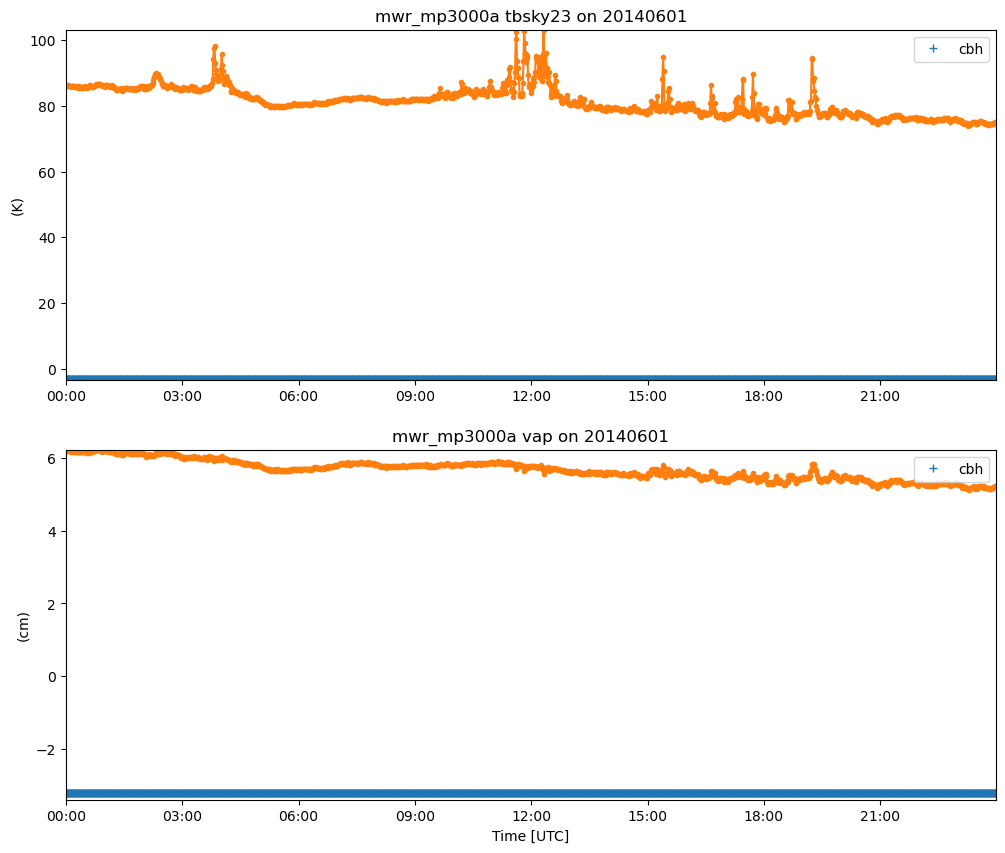

In [9]:
data = datetime.today()
hoje = data.strftime('%d-%m-%Y')
hora = data.strftime('%H-%M-%S')

#Access directores files downloaded

mwr_mp3000a_ds = act.io.armfiles.read_netcdf(f'{datastream}/{datastream}.*.cdf')
ceil_ds = act.io.armfiles.read_netcdf(f'{datastream}/{datastream}.*.cdf')


# Create a TimeSeriesDisplay object
mwr_mp3000a_ds = mwr_mp3000a_ds.resample(time='1min').nearest()
ceil_ds = ceil_ds.resample(time='1min').nearest()

display = act.plotting.TimeSeriesDisplay(
   {'mwr_mp3000a': mwr_mp3000a_ds, 'mwr_mp3000a_': ceil_ds},
   subplot_shape=(2,), figsize=(12,10)
)

# Plot data
display.plot('lat', dsname='mwr_mp3000a_', marker='+', markeredgewidth=1,
   linewidth=0, subplot_index=(0,), label='cbh')
display.plot('tbsky23', dsname='mwr_mp3000a', cmap='act_HomeyerRainbow', set_shading='nearest',
   add_nan=True, subplot_index=(0,))

display.plot('lat', dsname='mwr_mp3000a_', marker='+', markeredgewidth=1,
   linewidth=0, subplot_index=(1,), label='cbh')
display.plot('vap', dsname='mwr_mp3000a', cmap='act_HomeyerRainbow', set_shading='nearest',
   add_nan=True, subplot_index=(1,))
plt.savefig(f'{datastream}/output/figures/{datastream}_{hoje}_{hora}.png')

REFERENCES:

@misc{zhang, title={MWR Retrievals (MWRRET1LILJCLOU)}, DOI={10.5439/1027369}, journal={Atmospheric Radiation Measurement (ARM) user facility}, author={Zhang, Damao} }